In [1]:
import os
import cv2
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import imageio

In [16]:
import random
import cv2
from matplotlib import pyplot as plt
import albumentations as A
import numpy as np
import tensorflow as tf

def view_transform(image):
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(image) 
    
def display(display_list,name):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True '+name+' Mask', 'Predicted '+name+' Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        #plt.imsave('C:/Users/Admin/Desktop/test.jpg',tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [50]:
#============================================================================================
# up&down
#============================================================================================
def updown(lst1,lst2,lst3):
    image1,image2,food_mask1,food_mask2,weight1,weight2 = lst1[0],lst1[1],lst2[0],lst2[1],lst3[0],lst3[1]
    
    #image
    half1 = image1[:64]
    half2 = image2[64:]
    new_img_half = np.concatenate([half1,half2])
    new_img_half_for_model = np.expand_dims(new_img_half,axis=0)/255.0

    #mask
    half1m = food_mask1[:64]
    half2m = food_mask2[64:]
    new_img_halfm = np.concatenate([half1m,half2m])
    new_img_halfm = np.expand_dims(new_img_halfm,-1)
    new_img_halfm = np.expand_dims(new_img_halfm,axis=0)

    #weight
    half1w = weight1[:64]
    half2w = weight2[64:]
    new_img_halfw = np.concatenate([half1w,half2w])
    new_img_halfw = np.expand_dims(new_img_halfw,-1)
    new_img_halfw = np.expand_dims(new_img_halfw,axis=0)
    
    return new_img_half_for_model,new_img_halfm,new_img_halfw

#============================================================================================
# left&right
#============================================================================================
def leftright(lst1,lst2,lst3):
    image1,image2,food_mask1,food_mask2,weight1,weight2 = lst1[0],lst1[1],lst2[0],lst2[1],lst3[0],lst3[1]
    #image
    half1 = image1[:128,:64]
    half2 = image2[:128,64:]
    new_img_half = np.concatenate([half1,half2],1)
    new_img_half_for_model = np.expand_dims(new_img_half,axis=0)/255.0

    #mask
    half1m = food_mask1[:128,:64]
    half2m = food_mask2[:128,64:]
    new_img_halfm = np.concatenate([half1m,half2m],1)
    new_img_halfm = np.expand_dims(new_img_halfm,-1)
    new_img_halfm = np.expand_dims(new_img_halfm,axis=0)

    #weight
    half1w = weight1[:128,:64]
    half2w = weight2[:128,64:]
    new_img_halfw = np.concatenate([half1w,half2w],1)
    new_img_halfw = np.expand_dims(new_img_halfw,-1)
    new_img_halfw = np.expand_dims(new_img_halfw,axis=0)
    
    return new_img_half_for_model,new_img_halfm,new_img_halfw

#============================================================================================
# quarter
#============================================================================================
def quarter(lst1,lst2,lst3):
    image1,image2,image3,image4,food_mask1,food_mask2,food_mask3,food_mask4,weight1,weight2,weight3,weight4 = lst1[0],lst1[1],lst1[2],lst1[3],lst2[0],lst2[1],lst2[2],lst2[3],lst3[0],lst3[1],lst3[2],lst3[3]
    #image
    quad1 = image1[:64,:64]
    quad2 = image2[:64,64:]
    quad3 = image3[64:,:64]
    quad4 = image4[64:,64:]
    onehalf1 = np.concatenate([quad1,quad2],1)
    onehalf2 = np.concatenate([quad3,quad4],1)
    full = np.concatenate([onehalf1,onehalf2])
    full_for_model = np.expand_dims(full,axis=0)/255.0

    #mask
    quad1m = food_mask1[:64,:64]
    quad2m = food_mask2[:64,64:]
    quad3m = food_mask3[64:,:64]
    quad4m = food_mask4[64:,64:]
    onehalf1m = np.concatenate([quad1m,quad2m],1)
    onehalf2m = np.concatenate([quad3m,quad4m],1)
    fullm = np.concatenate([onehalf1m,onehalf2m])
    fullm = np.expand_dims(fullm,-1)
    fullm = np.expand_dims(fullm,axis=0)

    #weight
    quad1w = weight1[:64,:64]
    quad2w = weight2[:64,64:]
    quad3w = weight3[64:,:64]
    quad4w = weight4[64:,64:]
    onehalf1w = np.concatenate([quad1w,quad2w],1)
    onehalf2w = np.concatenate([quad3w,quad4w],1)
    fullw = np.concatenate([onehalf1w,onehalf2w])
    fullw = np.expand_dims(fullw,-1)
    fullw = np.expand_dims(fullw,axis=0)

    return full_for_model, fullm, fullw

#============================================================================================
# 4 vertical bars
#============================================================================================
def vertical4bars(lst1,lst2,lst3):
    image1,image2,image3,image4,food_mask1,food_mask2,food_mask3,food_mask4,weight1,weight2,weight3,weight4 = lst1[0],lst1[1],lst1[2],lst1[3],lst2[0],lst2[1],lst2[2],lst2[3],lst3[0],lst3[1],lst3[2],lst3[3]
    #image
    bar1 = image1[:128,:32]
    bar2 = image2[:128,32:64]
    bar3 = image3[:128,64:96]
    bar4 = image4[:128,96:128]
    first_half = np.concatenate([bar1,bar2],1)
    second_half = np.concatenate([bar3,bar4],1)
    full = np.concatenate([first_half,second_half],1)
    full_for_model = np.expand_dims(full,axis=0)/255.0

    #mask
    bar1m = food_mask1[:128,:32]
    bar2m = food_mask2[:128,32:64]
    bar3m = food_mask3[:128,64:96]
    bar4m = food_mask4[:128,96:128]
    first_halfm = np.concatenate([bar1m,bar2m],1)
    second_halfm = np.concatenate([bar3m,bar4m],1)
    fullm = np.concatenate([first_halfm,second_halfm],1)
    fullm = np.expand_dims(fullm,-1)
    fullm = np.expand_dims(fullm,axis=0)

    #weight
    quad1w = weight1[:128,:32]
    quad2w = weight2[:128,32:64]
    quad3w = weight3[:128,64:96]
    quad4w = weight4[:128,96:128]
    onehalf1w = np.concatenate([quad1w,quad2w],1)
    onehalf2w = np.concatenate([quad3w,quad4w],1)
    fullw = np.concatenate([onehalf1w,onehalf2w],1)
    fullw = np.expand_dims(fullw,-1)
    fullw = np.expand_dims(fullw,axis=0)
    
    return full_for_model, fullm, fullw

#============================================================================================
# 4 horizontal bars
#============================================================================================
def horizontal4bars(lst1,lst2,lst3):
    image1,image2,image3,image4,food_mask1,food_mask2,food_mask3,food_mask4,weight1,weight2,weight3,weight4 = lst1[0],lst1[1],lst1[2],lst1[3],lst2[0],lst2[1],lst2[2],lst2[3],lst3[0],lst3[1],lst3[2],lst3[3]
    
    #image
    bar1 = image1[:32,:128]
    bar2 = image2[32:64,:128]
    bar3 = image3[64:96,:128]
    bar4 = image4[96:128,:128]
    first_half = np.concatenate([bar1,bar2])
    second_half = np.concatenate([bar3,bar4])
    full = np.concatenate([first_half,second_half])
    full_for_model = np.expand_dims(full,axis=0)/255.0

    #mask
    bar1m = food_mask1[:32,:128]
    bar2m = food_mask2[32:64,:128]
    bar3m = food_mask3[64:96,:128]
    bar4m = food_mask4[96:128,:128]
    first_halfm = np.concatenate([bar1m,bar2m])
    second_halfm = np.concatenate([bar3m,bar4m])
    fullm = np.concatenate([first_halfm,second_halfm])
    fullm = np.expand_dims(fullm,-1)
    fullm = np.expand_dims(fullm,axis=0)

    #weight
    quad1w = weight1[:32,:128]
    quad2w = weight2[32:64,:128]
    quad3w = weight3[64:96,:128]
    quad4w = weight4[96:128,:128]
    onehalf1w = np.concatenate([quad1w,quad2w])
    onehalf2w = np.concatenate([quad3w,quad4w])
    fullw = np.concatenate([onehalf1w,onehalf2w])
    fullw = np.expand_dims(fullw,-1)
    fullw = np.expand_dims(fullw,axis=0)
    
    return full_for_model, fullm,fullw

#============================================================================================
# 16 boxes from 3 images
#============================================================================================
def merge3img(lst1,lst2,lst3):
    image1,image2,image3,food_mask1,food_mask2,food_mask3,weight1,weight2,weight3 = lst1[0],lst1[1],lst1[2],lst2[0],lst2[1],lst2[2],lst3[0],lst3[1],lst3[2]
        
    #image
    box1 = image1[:32,:32]
    box2 = image1[32:64,32:64]
    box3 = image1[64:96,64:96]
    box4 = image1[96:128,96:128]
    box5 = image2[96:128,:32]
    box6 = image2[64:96,32:64]
    box7 = image2[32:64,64:96]
    box8 = image2[:32,96:128]

    box9 = image3[32:64,:32]
    box10 = image3[64:96,:32]
    box11 = image3[:32,32:64]
    box12 = image3[:32,64:96]
    box13 = image3[32:64,96:128]
    box14 = image3[64:96,96:128]
    box15 = image3[96:128,32:64]
    box16 = image3[96:128,64:96]

    con1 = np.concatenate([box1,box9,box10,box5])
    con2 = np.concatenate([box11,box2,box6,box16])
    con3 = np.concatenate([box12,box7,box3,box15])
    con4 = np.concatenate([box8,box13,box14,box4])

    full = np.concatenate([con1,con2,con3,con4],1)
    full_for_model = np.expand_dims(full,axis=0)/255.0

    #mask
    box1m = food_mask1[:32,:32]
    box2m = food_mask1[32:64,32:64]
    box3m = food_mask1[64:96,64:96]
    box4m = food_mask1[96:128,96:128]
    box5m = food_mask2[96:128,:32]
    box6m = food_mask2[64:96,32:64]
    box7m = food_mask2[32:64,64:96]
    box8m = food_mask2[:32,96:128]

    box9m = food_mask3[32:64,:32]
    box10m = food_mask3[64:96,:32]
    box11m = food_mask3[:32,32:64]
    box12m = food_mask3[:32,64:96]
    box13m = food_mask3[32:64,96:128]
    box14m = food_mask3[64:96,96:128]
    box15m = food_mask3[96:128,32:64]
    box16m = food_mask3[96:128,64:96]

    con1m = np.concatenate([box1m,box9m,box10m,box5m])
    con2m = np.concatenate([box11m,box2m,box6m,box16m])
    con3m = np.concatenate([box12m,box7m,box3m,box15m])
    con4m = np.concatenate([box8m,box13m,box14m,box4m])

    fullm = np.concatenate([con1m,con2m,con3m,con4m],1)
    fullm = np.expand_dims(fullm,-1)
    fullm = np.expand_dims(fullm,axis=0)

    #weight
    box1w = weight1[:32,:32]
    box2w = weight1[32:64,32:64]
    box3w = weight1[64:96,64:96]
    box4w = weight1[96:128,96:128]
    box5w = weight2[96:128,:32]
    box6w = weight2[64:96,32:64]
    box7w = weight2[32:64,64:96]
    box8w = weight2[:32,96:128]

    box9w = weight3[32:64,:32]
    box10w = weight3[64:96,:32]
    box11w = weight3[:32,32:64]
    box12w = weight3[:32,64:96]
    box13w = weight3[32:64,96:128]
    box14w = weight3[64:96,96:128]
    box15w = weight3[96:128,32:64]
    box16w = weight3[96:128,64:96]

    con1w = np.concatenate([box1w,box9w,box10w,box5w])
    con2w = np.concatenate([box11w,box2w,box6w,box16w])
    con3w = np.concatenate([box12w,box7w,box3w,box15w])
    con4w = np.concatenate([box8w,box13w,box14w,box4w])

    fullw = np.concatenate([con1w,con2w,con3w,con4w],1)
    fullw = np.expand_dims(fullw,-1)
    fullw = np.expand_dims(fullw,axis=0)
    
    return full_for_model, fullm, fullw


In [78]:
image_path1 = 'C:/Users/Admin/Desktop/jun/University/Year 4/GDP/work/code/notebooks/run/dataset/UNIMIB2016 Food Database/test/food_images/images/20151130_122225.jpg'
food_mask_path1 = 'C:/Users/Admin/Desktop/jun/University/Year 4/GDP/work/code/notebooks/run/dataset/UNIMIB2016 Food Database/test/food_masks/images/20151130_122225.png'

image_path2 = 'C:/Users/Admin/Desktop/jun/University/Year 4/GDP/work/code/notebooks/run/dataset/UNIMIB2016 Food Database/train/food_images/images/20151127_115151.jpg'
food_mask_path2 = 'C:/Users/Admin/Desktop/jun/University/Year 4/GDP/work/code/notebooks/run/dataset/UNIMIB2016 Food Database/train/food_masks/images/20151127_115151.png'

image_path3 = 'C:/Users/Admin/Desktop/jun/University/Year 4/GDP/work/code/notebooks/run/dataset/UNIMIB2016 Food Database/train/food_images/images/20151127_125858.jpg'
food_mask_path3 = 'C:/Users/Admin/Desktop/jun/University/Year 4/GDP/work/code/notebooks/run/dataset/UNIMIB2016 Food Database/train/food_masks/images/20151127_125858.png'

image_path4 = 'C:/Users/Admin/Desktop/jun/University/Year 4/GDP/work/code/notebooks/run/dataset/UNIMIB2016 Food Database/train/food_images/images/20151204_131144.jpg'
food_mask_path4 = 'C:/Users/Admin/Desktop/jun/University/Year 4/GDP/work/code/notebooks/run/dataset/UNIMIB2016 Food Database/train/food_masks/images/20151204_131144.png'

TARGET_SIZE = (128,128)

image1 = cv2.imread(image_path1)
image1 = cv2.resize(image1,TARGET_SIZE)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
food_mask1 = cv2.imread(food_mask_path1)
food_mask1 = cv2.resize(food_mask1,TARGET_SIZE, interpolation=cv2.INTER_NEAREST)
food_mask1 = cv2.cvtColor(food_mask1, cv2.COLOR_RGB2GRAY) 

image2 = cv2.imread(image_path2)
image2 = cv2.resize(image2,TARGET_SIZE)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
food_mask2 = cv2.imread(food_mask_path2)
food_mask2 = cv2.resize(food_mask2,TARGET_SIZE, interpolation=cv2.INTER_NEAREST)
food_mask2 = cv2.cvtColor(food_mask2, cv2.COLOR_RGB2GRAY) 

image3 = cv2.imread(image_path3)
image3 = cv2.resize(image3,TARGET_SIZE)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
food_mask3 = cv2.imread(food_mask_path3)
food_mask3 = cv2.resize(food_mask3,TARGET_SIZE, interpolation=cv2.INTER_NEAREST)
food_mask3 = cv2.cvtColor(food_mask3, cv2.COLOR_RGB2GRAY) 

image4 = cv2.imread(image_path4)
image4 = cv2.resize(image4,TARGET_SIZE)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
food_mask4 = cv2.imread(food_mask_path4)
food_mask4 = cv2.resize(food_mask4,TARGET_SIZE, interpolation=cv2.INTER_NEAREST)
#food_mask4 = cv2.cvtColor(food_mask4, cv2.COLOR_RGB2GRAY) 

In [79]:
food_mask4[:,:,0].shape

(128, 128)

In [57]:
#image, mask = updown(image1,image2,food_mask1,food_mask2)
#image, mask = leftright(image1,image2,food_mask1,food_mask2)
#image, mask = quarter(image1,image2,image3,image4,food_mask1,food_mask2,food_mask3,food_mask4)
#image, mask = vertical4bars(image1,image2,image3,image4,food_mask1,food_mask2,food_mask3,food_mask4)
#image, mask = horizontal4bars(image1,image2,image3,image4,food_mask1,food_mask2,food_mask3,food_mask4)
#image, mask = merge3img(image1,image2,image3,food_mask1,food_mask2,food_mask3)

In [72]:
mask.shape

(128, 128, 1)

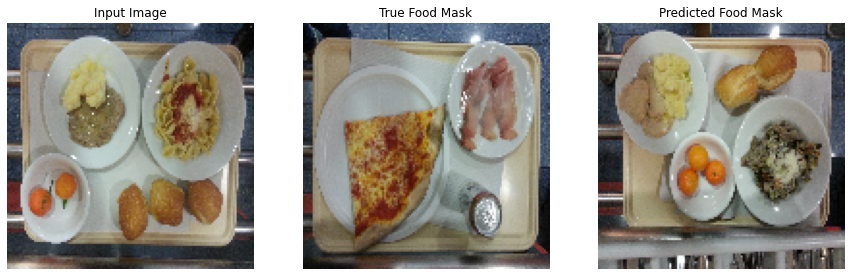

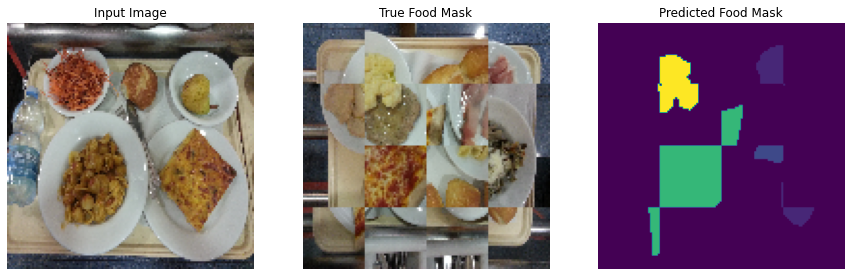

In [58]:
display([image1, image2, image3],'Food')
display([image4, np.squeeze(image,0), mask],'Food')

In [61]:
def say(s):
    print(s)

def hello(s):
    print(123)
    
func = [say,hello]

In [66]:
func[1]('hello world')

123


In [70]:
from random import randint
r = randint(0,2)

In [81]:
def w(s,q):
    print(s)
    print(q)